<a href="https://colab.research.google.com/github/RiteshopShrivastava/Assignment_5_Multi_linear_regression_Toyota/blob/main/Assignment_5_MLR_Toyota_Corolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
#Read the data
toyota_data = pd.read_csv("/content/ToyotaCorolla.csv", encoding= 'unicode_escape')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [46]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [47]:
toyota_temp = pd.concat([toyota_data.iloc[:,2:4], toyota_data.iloc[:,6],toyota_data.iloc[:,8], toyota_data.iloc[:,12:14],toyota_data.iloc[:,15:18]], axis=1)
toyota_temp

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [48]:
toyota1 = toyota_temp.rename({'Age_08_04':'Age', 'cc':'Cylinder_vol', 'Quarterly_Tax': 'Q_tax'}, axis=1)
toyota1

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [49]:
#check for missing values
toyota1.isna().sum()

Price           0
Age             0
KM              0
HP              0
Cylinder_vol    0
Doors           0
Gears           0
Q_tax           0
Weight          0
dtype: int64

In [50]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [51]:
toyota1.shape

(1436, 9)

In [52]:
toyota2 = toyota1.drop_duplicates().reset_index()

In [53]:
toyota2

,index,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [61]:
toyota2= toyota2.drop(['index'], axis=1)
toyota2

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Correlation Matrix

In [62]:
toyota2.corr()

,Price,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
Cylinder_vol,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Q_tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Scatterplot between variables along with histograms

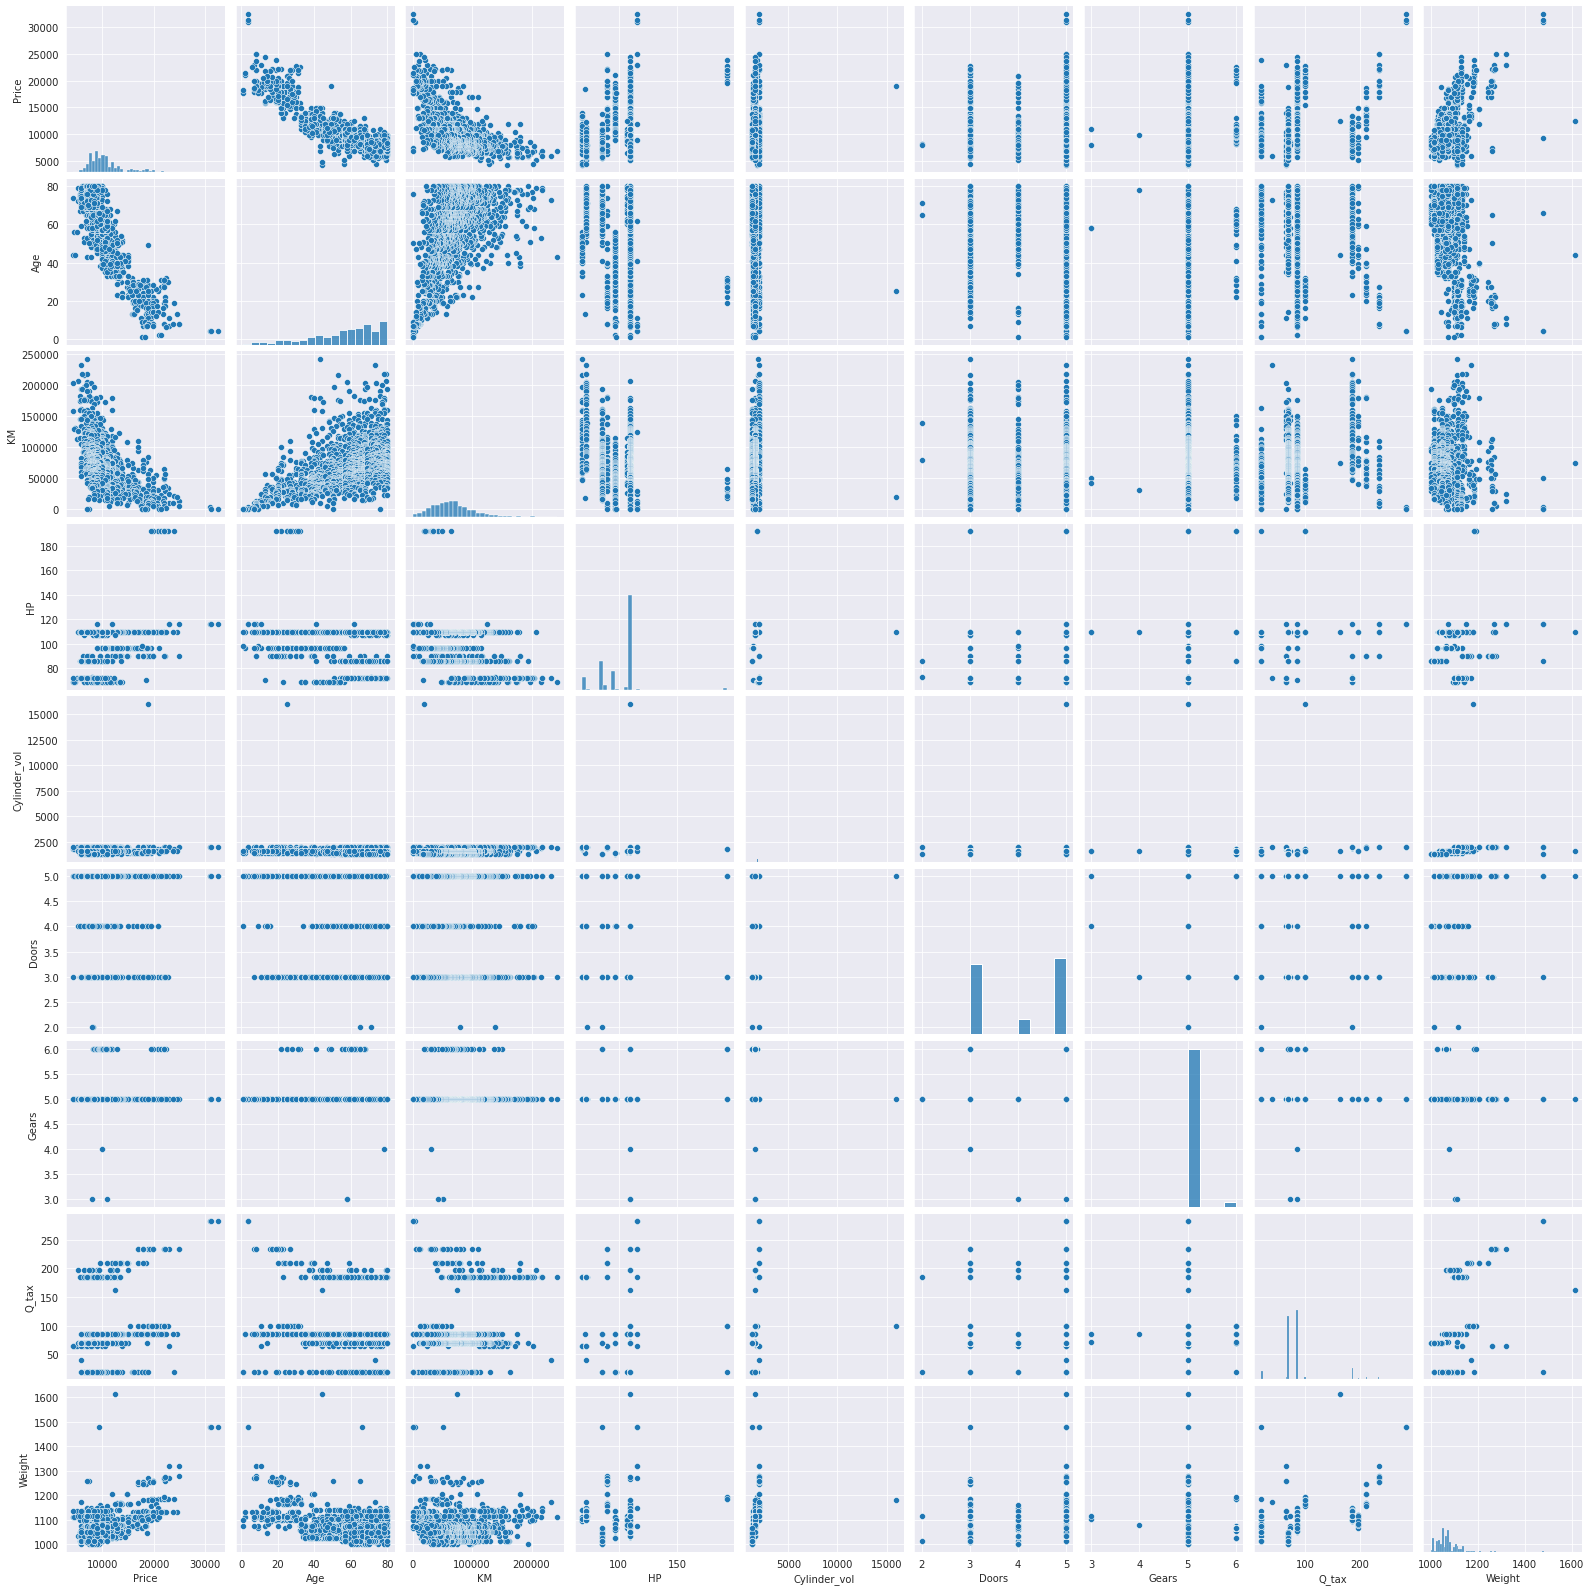

In [64]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)


# Preparing a model

In [72]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit()

In [73]:
#Coefficients
model.params

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
Cylinder_vol      -0.118558
Doors             -0.920189
Gears            597.715894
Q_tax              3.858805
Weight            16.855470
dtype: float64

In [80]:
#t and p-Values
np.round(model.tvalues, decimals=5) , np.round(model.pvalues, decimals=5)


(Intercept       -3.87527
 Age            -46.55188
 KM             -16.55242
 HP              11.20972
 Cylinder_vol    -1.31644
 Doors           -0.02301
 Gears            3.03456
 Q_tax            2.94420
 Weight          15.76066
 dtype: float64, Intercept       0.00011
 Age             0.00000
 KM              0.00000
 HP              0.00000
 Cylinder_vol    0.18824
 Doors           0.98164
 Gears           0.00245
 Q_tax           0.00329
 Weight          0.00000
 dtype: float64)

Cylinder_vol & Doors are insignificant as per P values

In [81]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:01:01   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM              -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP              31.5846      2.818     11.210      0.000      26.058      37.112
Cylinder_vol    -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors           -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears          597.7159    196.969      3.035      0.002     211.335     984.097
Q_tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [83]:
ml_C_vol=smf.ols('Price ~ Cylinder_vol',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)  

Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


Cylinder_vol is significant when taken independently

In [84]:
ml_C_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.29e-06
Time:                        21:00:32   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9053.5368    363.894     24.880      0.000    8339.715    9767.359
Cylinder_vol     1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
ml_D=smf.ols('Price ~ Doors',data = toyota2).fit()
#t and p-Values
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)  


Intercept       24.879592
Cylinder_vol     4.745039
dtype: float64 
 Intercept       7.236022e-114
Cylinder_vol     2.292856e-06
dtype: float64


Doors is also significant when taken independently

In [91]:
ml_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.40e-12
Time:                        21:07:32   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
ml_C_D=smf.ols('Price~Cylinder_vol+Doors',data = toyota2).fit()  
print(ml_C_D.tvalues, '\n', ml_C_D.pvalues)  

Intercept       12.786341
Cylinder_vol     4.268006
Doors            6.752236
dtype: float64 
 Intercept       1.580945e-35
Cylinder_vol    2.101878e-05
Doors           2.109558e-11
dtype: float64


# Model Validation

# Calculating VIF values to check collinearty

In [97]:
rsq_Age = smf.ols('Age ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM ~ Age+HP+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP ~ KM+Age+Cylinder_vol+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CV = smf.ols('Cylinder_vol ~ KM+HP+Age+Doors+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_CV = 1/(1-rsq_CV)

rsq_D = smf.ols('Doors ~ KM+HP+Cylinder_vol+Age+Gears+Q_tax+Weight',data=toyota2).fit().rsquared
vif_D = 1/(1-rsq_D)

rsq_G = smf.ols('Gears ~ KM+HP+Cylinder_vol+Doors+Age+Q_tax+Weight',data=toyota2).fit().rsquared
vif_G = 1/(1-rsq_G)

rsq_QT = smf.ols('Q_tax ~ KM+HP+Cylinder_vol+Doors+Gears+Age+Weight',data=toyota2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_W = smf.ols('Weight ~ KM+HP+Cylinder_vol+Doors+Gears+Q_tax+Age',data=toyota2).fit().rsquared
vif_W = 1/(1-rsq_W)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Cylinder_vol', 'Doors', 'Gears', 'Q_tax', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CV, vif_D, vif_G, vif_QT,vif_W]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,Cylinder_vol,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Q_tax,2.295375
7,Weight,2.487180


In [ ]:
# All the variables have vif < 20, therfore no multicolinearty in variables, will consider all the variables in model building

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

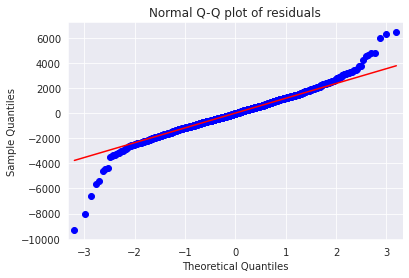

In [98]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [99]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [100]:
list(np.where(model.resid < -6000))

[array([220, 600, 959])]

## Residual Plot for Homoscedasticity

In [103]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # z = (x-mu)/sigma

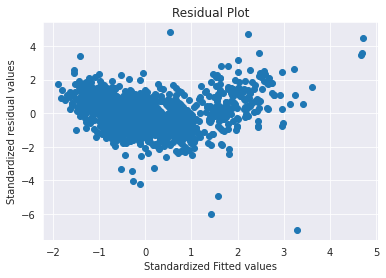

In [104]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

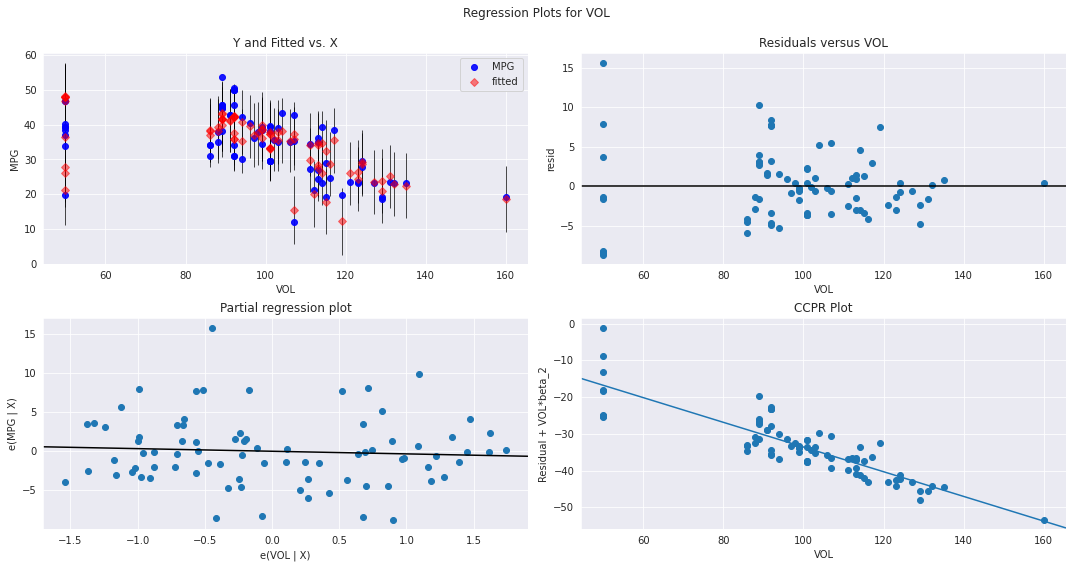

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

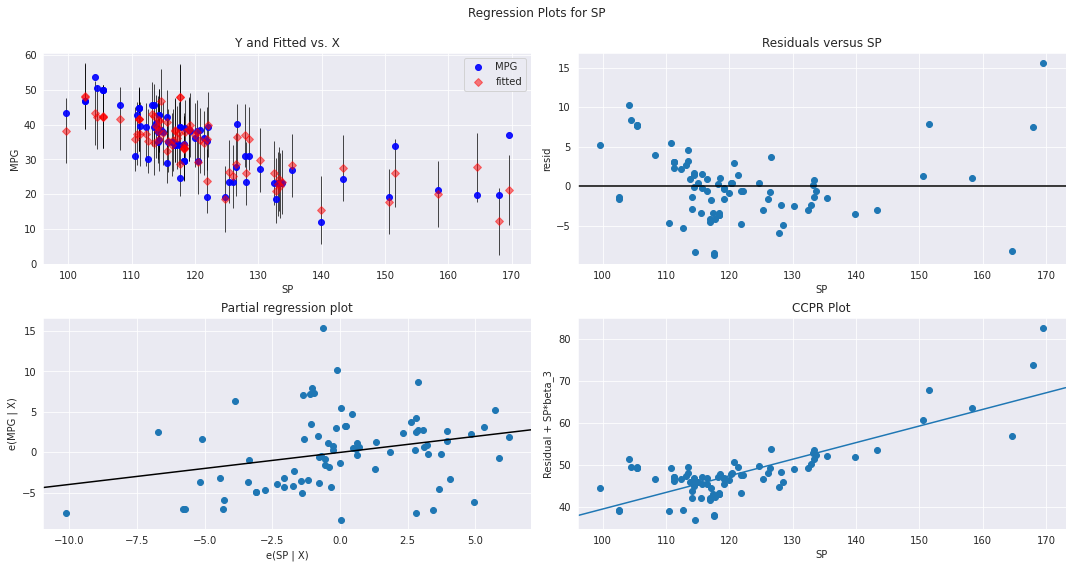

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

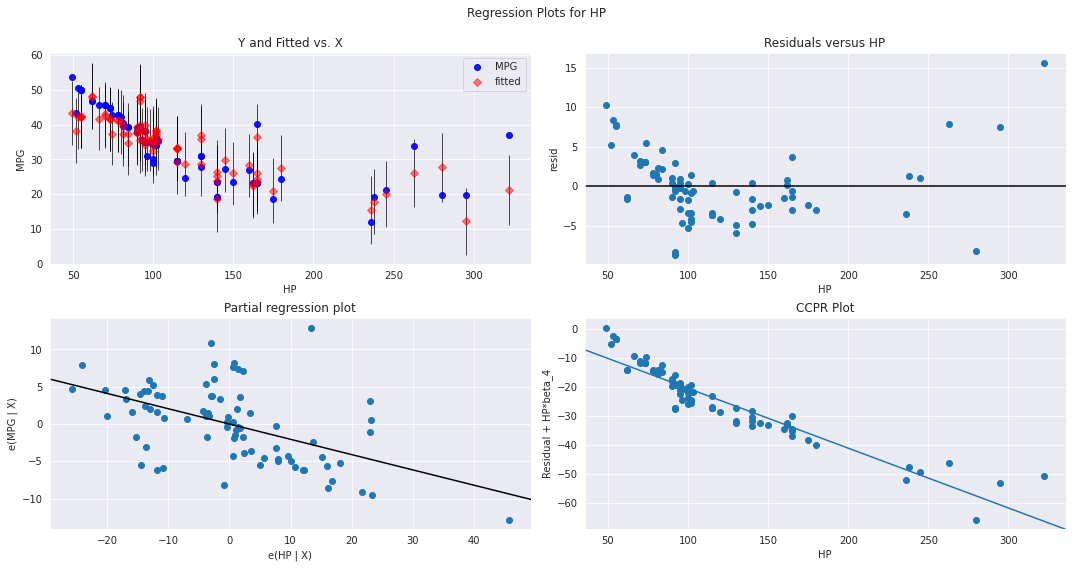

In [ ]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

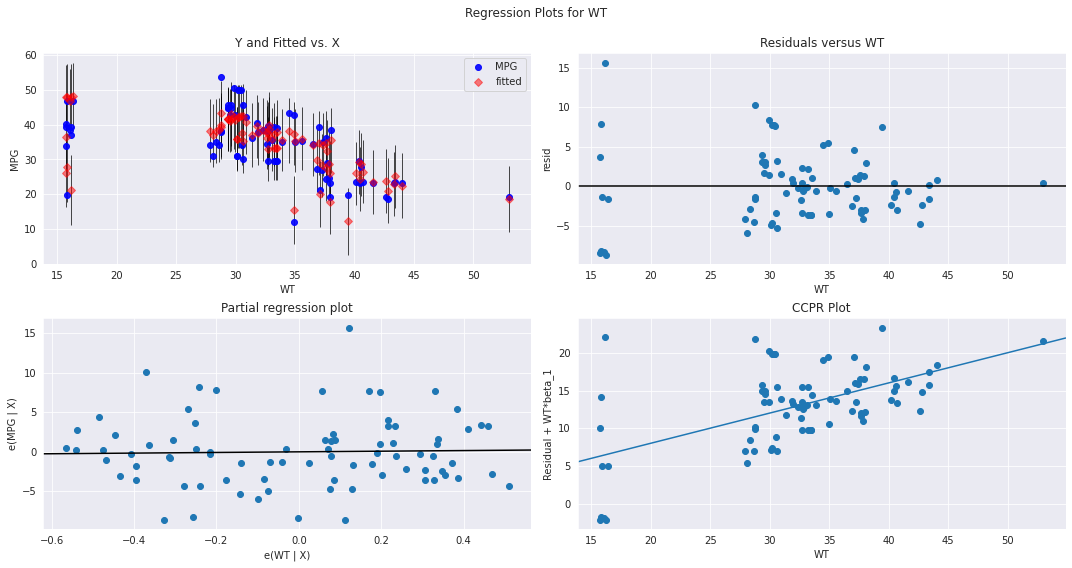

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [ ]:
model_influence = model.get_influence() # get_influence() drived from our model i.e 'model"
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


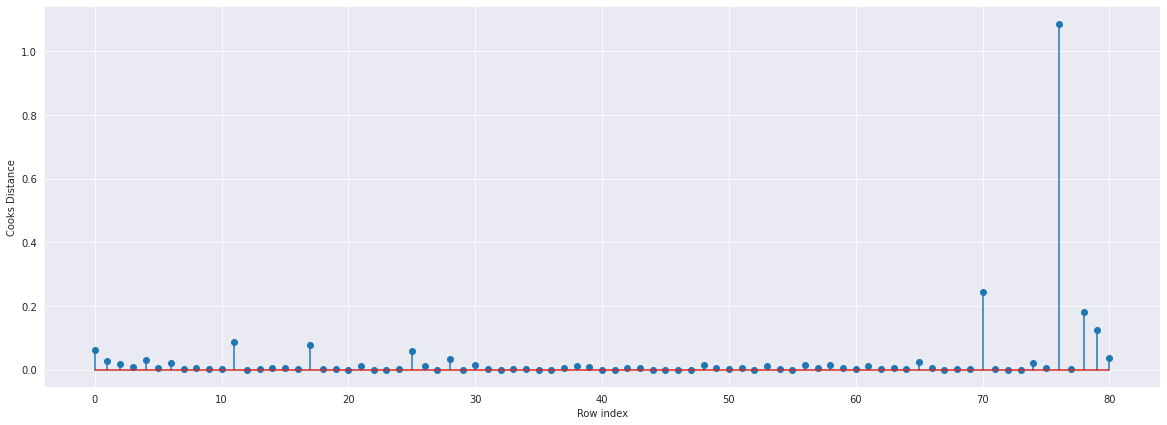

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998180016)

## High Influence points ( Leverage value)

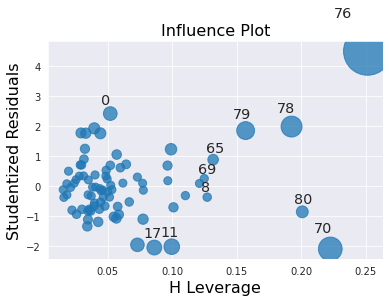

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = cars.shape[1] # K is no. of columns

n = cars.shape[0] # n is no. of rows
print(k, n)

leverage_cutoff = 3*((k + 1)/n)

5
5 81


In [ ]:
leverage_cutoff

0.2222222222222222

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [ ]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [ ]:
#Load the data
cars_new = pd.read_csv("Cars.csv")

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [ ]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [ ]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [ ]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376004, 446.11722639447737)

In [ ]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [ ]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8160034320495304, 446.1884323575031)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


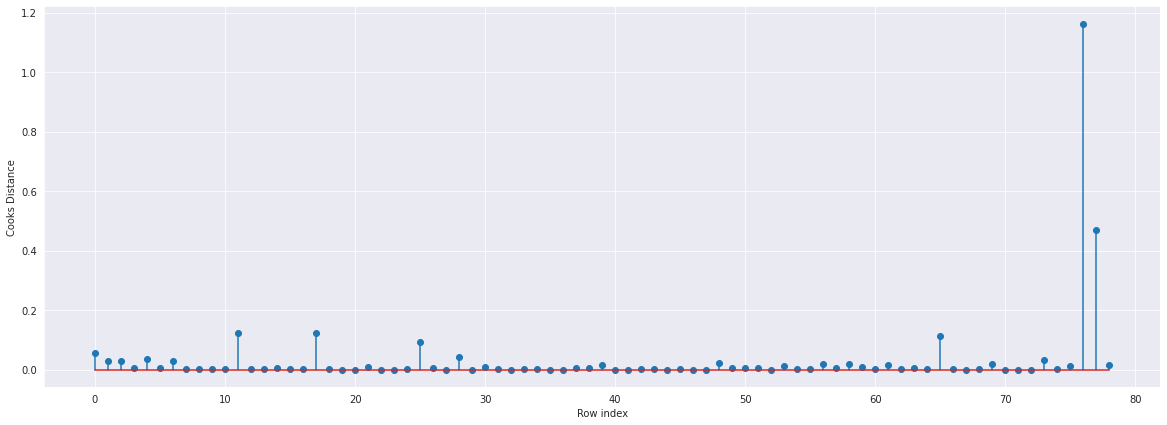

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135186)

In [ ]:
#Drop 76 and 77 observations
#76 is outlier having value more than 1, also deleting 77th record it may be outlier in next iteration

car2=car1.drop(car1.index[[76,77]],axis=0) 

In [ ]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [ ]:
car3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [ ]:
# drop the original index
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


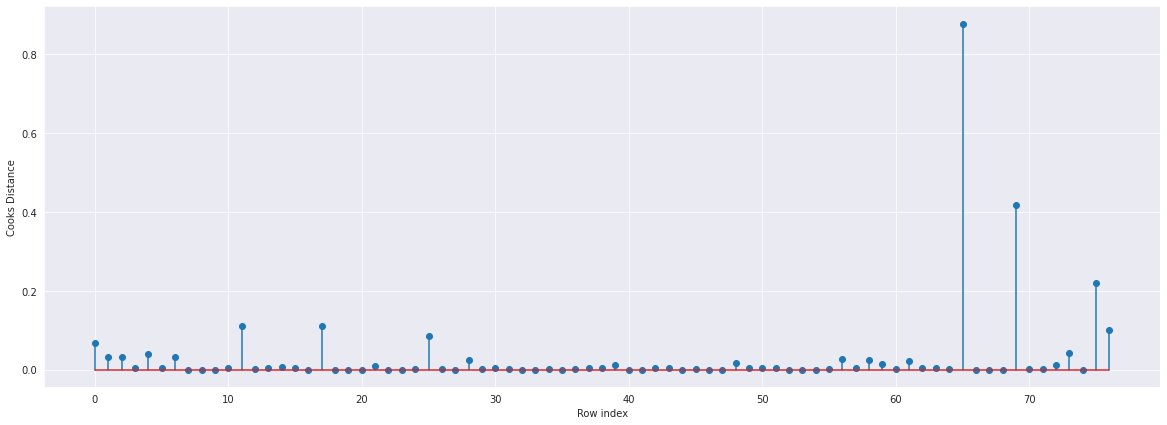

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296689)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.866963611185906, 409.41530627195084)

## Predicting for new data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [ ]:
new_data

,HP,VOL,SP,WT
1,40,95,102,35


In [ ]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [ ]:
final_ml_V.predict(cars_new.iloc[0:5,]) #

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [ ]:
pred_y = final_ml_V.predict(cars_new)

In [ ]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64